https://api.semanticscholar.org/CorpusID:27293635

# **Imports**

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
!pip install lime shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=082fd175e2d0ccdf599fdd38e697cfc606b96d18a0d5ccf85f18154b247970a8
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import pandas as pd
import gdown  # to download data from google drive
import gzip   # to decompress downloaded data
import shutil

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
from lime import lime_tabular
import shap

#**Load and Split dataset**

In [ ]:
def download_data(folder_id):
    url = f"https://drive.google.com/drive/folders/{folder_id}"
    # gdown URL formate
    gdown.download_folder(url=url, output="./downloaded_folder", quiet=False, use_cookies=False)

In [ ]:
def decompress_gz(file_path, output_file_name):
    with gzip.open(file_path, 'rb') as f_in:
        with open(output_file_name, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [ ]:
if __name__ == '__main__':
    # downloading raw dataset
    download_data("14ZG8utOf0Ry76w_T9rqrk5kdhhPIK84P")
    decompress_gz('/content/downloaded_folder/accepted_2007_to_2018Q4.csv.gz', "accepted.csv")

Retrieving folder contents


Retrieving folder 1UGhBnl-1KamEMI_jeSrYZC6Zp7HtmTKf extras
Processing file 1Rkf__uZbEm8ywaZ5ZdZXtknrPDeoH9KU confusion matrices.png
Processing file 1S-aQezZ35nOVke49jPKCJu6bLnePD9P8 decision_tree.png
Processing file 1nnwa05ycQ2vbsmy_0S7QpdZdPNTtZiIV Important features .png
Processing file 1lLc7u5ghmcZowpJhr58MMWNVMywVj7wA Learning Curve Log_Reg.jpg
Processing file 1G10InrGbyxf3J-M1DEbd2aeOdzBEhUCA Learning Curve Random Forest.jpg
Processing file 1TcM7nnnLHPZet5_mJ0_2LrjL6LHzcoxl LightGBM Feature Importance.png
Processing file 1JU4u7cqAOOqRtEuLu9ds5wpUzXGpFymE LightGBM feature importance(gain).png
Processing file 1uj6RpBJ_AphY9647eOkCBPzrQvw9K4la Log_Reg Interpretability.jpg
Processing file 14ZTvA-J_R4_rrAqN60ffb9WT20fjdO-T Residual Plot Log_Reg.jpg
Processing file 13NX762lSljrdO6XIinOrM7gdjS0pSuAB ROC curve Log_Reg.jpg
Processing file 1wguiykC7WAYTGdi4Fud_De0FqtKqeV6W ROC Curves for SVM Models.png
Processing file 1u6td4gAKFTxMRt_--0SdTo6GcRRkZhaD ROC of LightGBM.png
Processing file 1vN

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Rkf__uZbEm8ywaZ5ZdZXtknrPDeoH9KU
To: /content/downloaded_folder/extras/confusion matrices.png
100%|██████████| 34.4k/34.4k [00:00<00:00, 63.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1S-aQezZ35nOVke49jPKCJu6bLnePD9P8
To: /content/downloaded_folder/extras/decision_tree.png
100%|██████████| 292k/292k [00:00<00:00, 4.81MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nnwa05ycQ2vbsmy_0S7QpdZdPNTtZiIV
To: /content/downloaded_folder/extras/Important features .png
100%|██████████| 72.8k/72.8k [00:00<00:00, 3.33MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lLc7u5ghmcZowpJhr58MMWNVMywVj7wA
To: /content/downloaded_folder/extras/Learning Curve Log_Reg.jpg
100%|██████████| 54.3k/54.3k [00:00<00:00, 2.71MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G10InrGbyxf3J-M1DEbd2aeOdzBEhUCA
To: /conten

In [ ]:
data = pd.read_csv("/content/downloaded_folder/df_cleaned.csv", low_memory=False)
data.head()

,last_pymnt_d,total_rec_prncp,last_pymnt_amnt,out_prncp,total_rec_late_fee,last_fico_range_high,installment,loan_amnt,total_rec_int,out_prncp_inv,...,funded_amnt_inv,recoveries,debt_settlement_flag,hardship_flag,mo_sin_old_rev_tl_op,revol_util,dti,all_util,annual_inc,loan_status
0,17,-0.332581,-0.372797,0.420080,-0.261895,0.281611,-0.473027,-0.461473,0.413942,0.420298,...,-0.461004,-0.445598,0,0,-0.307356,0.608376,0.558953,0.915820,-1.203816,0
1,31,-0.840560,-0.473603,-0.629220,-0.261895,1.244049,-1.608631,-1.601510,-1.081823,-0.629167,...,-1.601271,-0.445598,0,0,-0.187187,-1.880835,-1.233491,-0.049124,0.274631,1
2,27,-0.250720,-0.222228,2.263937,-0.261895,0.883135,1.252073,1.058575,-0.380182,2.264445,...,1.059353,-0.445598,0,0,-0.980297,0.431193,-0.223328,0.379740,2.227297,1
3,39,-0.458023,0.161605,-0.629220,-0.261895,0.161306,-1.364264,-1.373503,-0.909433,-0.629167,...,-1.373218,-0.445598,0,0,-1.472987,0.314511,-0.337836,0.433348,-1.231711,1
4,5,-0.415519,0.220569,-0.629220,-0.261895,0.221459,-1.317547,-1.348168,-0.834440,-0.629167,...,-1.347878,-0.445598,0,0,0.738107,1.273894,0.117928,1.559116,-0.841178,1


In [ ]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Ensemble Model**

## **Model Arch**

In [ ]:
def train_stacked_classification_model(X_train, X_test, y_train, y_test):
    """
    Train a stacking ensemble for classification using TabNet and XGBoost as base models,
    and a Random Forest as the meta-model. The base models are trained independently,
    and their predictions are concatenated with the original features to train the meta-model.

    Parameters:
    -----------
    X_train : ndarray
        Training features of shape (n_samples, n_features).
    X_test : ndarray
        Testing features of shape (n_samples, n_features).
    y_train : ndarray
        Training labels of shape (n_samples,).
    y_test : ndarray
        Testing labels of shape (n_samples,).

    Returns:
    --------
    meta_model : RandomForestClassifier
        Trained meta-model.
    metrics : dict
        Dictionary containing the classification accuracy on the test set.
    """
    tabnet = TabNetClassifier(verbose=0)
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # Convert Pandas DataFrames to NumPy arrays
    X_train = X_train.values if hasattr(X_train, 'values') else X_train
    X_test = X_test.values if hasattr(X_test, 'values') else X_test
    y_train = y_train.values if hasattr(y_train, 'values') else y_train
    y_test = y_test.values if hasattr(y_test, 'values') else y_test


    tabnet.fit(X_train, y_train)
    xgb.fit(X_train, y_train)

    tabnet_preds_train = tabnet.predict(X_train)
    xgb_preds_train = xgb.predict(X_train)
    tabnet_preds_test = tabnet.predict(X_test)
    xgb_preds_test = xgb.predict(X_test)

    # Stack original features with base model predictions
    X_train_meta = np.column_stack((X_train, tabnet_preds_train, xgb_preds_train))
    X_test_meta = np.column_stack((X_test, tabnet_preds_test, xgb_preds_test))

    meta_model = RandomForestClassifier()
    meta_model.fit(X_train_meta, y_train)

    final_preds = meta_model.predict(X_test_meta)
    accuracy = accuracy_score(y_test, final_preds)
    metrics = {'accuracy': accuracy}

    return meta_model, tabnet, xgb, metrics

In [ ]:
meta_model, tabnet, xgb, results = train_stacked_classification_model(X_train, X_test, y_train, y_test)
print(results)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:55:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'accuracy': 0.990443457121301}


In [ ]:
def predict_with_stack(meta_model, tabnet, xgb, X):
    X = X.values if hasattr(X, 'values') else X
    tabnet_preds = tabnet.predict(X)
    xgb_preds = xgb.predict(X)
    X_meta = np.column_stack((X, tabnet_preds, xgb_preds))
    return meta_model.predict(X_meta)

In [ ]:
y_pred = predict_with_stack(meta_model, tabnet, xgb, X_test)

## **Model Evaluation**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.990443457121301
Precision: 0.9876483410026641
Recall: 0.9939068973921521
F1 Score: 0.9907677356656949
ROC AUC: 0.990329498570524


Confusion Matrix:
[[11396   153]
 [   75 12234]]


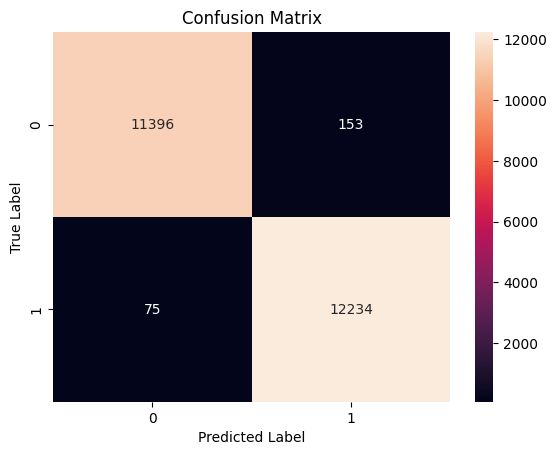

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **Model Explainability**

### **XGBoost PDP**

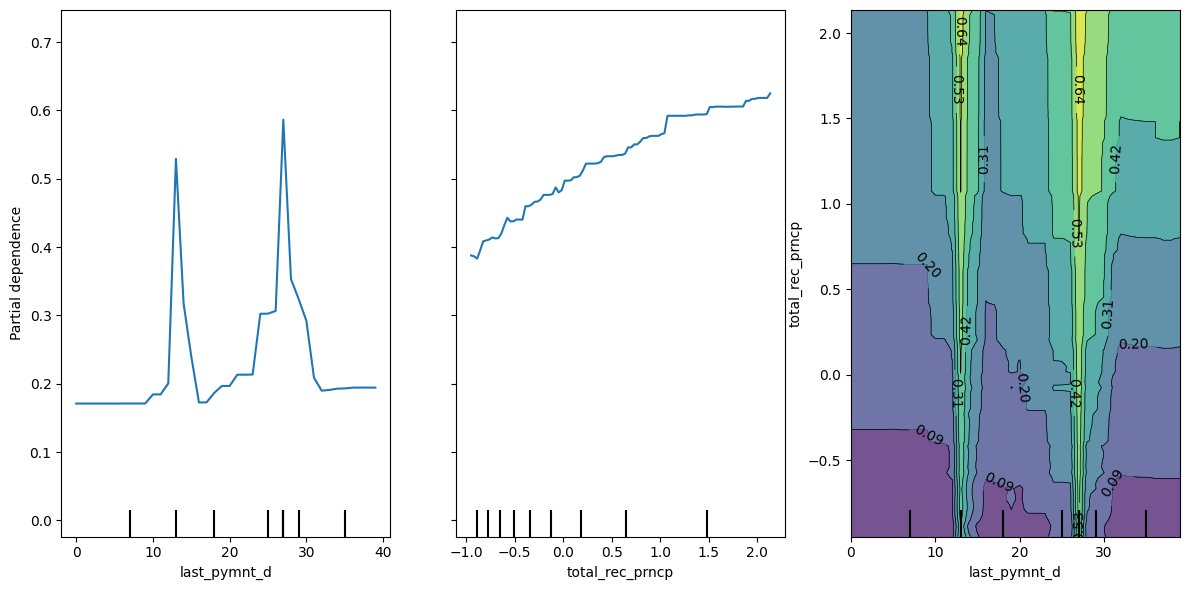

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(xgb, X_train, features=[0, 1, (0, 1)], ax=ax)
plt.tight_layout()
plt.show()


- sharp spikes: at certain values of **last_pymnt_d**, the prediction is moved to positive.

- the more **total_rec_prcnp** is increasing, the more it positively influences the model's prediction (+ve correlation)

### **XGBooost SHAP**

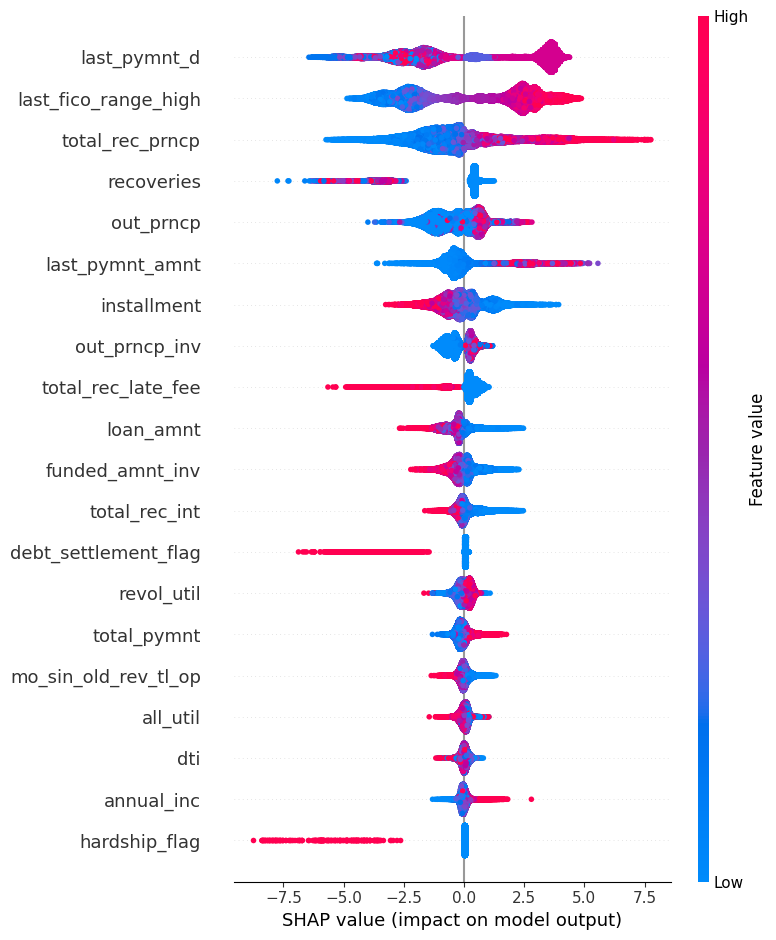

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

### **Tab Net Feature Importance**

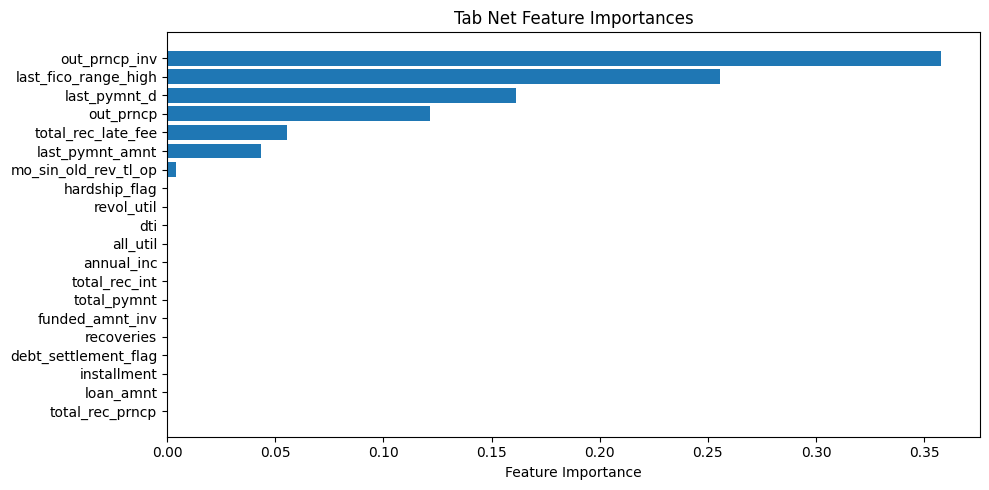

In [ ]:
feature_names = list(X_train.columns)
importances = tabnet.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[sorted_idx], np.array(importances)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Tab Net Feature Importances")
plt.tight_layout()
plt.show()


### **Meta Model Feature Importance**

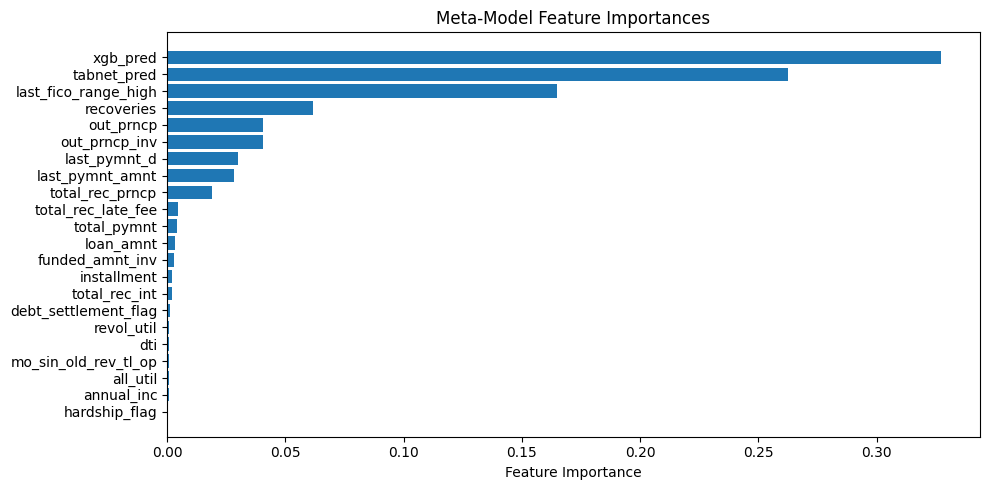

In [ ]:
feature_names = list(X_train.columns) + ["tabnet_pred", "xgb_pred"]
importances = meta_model.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[sorted_idx], np.array(importances)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Meta-Model Feature Importances")
plt.tight_layout()
plt.show()


### **LIME**

In [ ]:
class_names = ['Approved', 'Not Approved']

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=class_names,
)

exp = explainer.explain_instance(
    data_row=X_test.iloc[0].values,
    predict_fn=lambda x: meta_model.predict_proba( #The lambda takes each row, gets predictions from TabNet and XGBoost, adds their two predictions as new columns,on the og 20 making it 22
        np.column_stack((x, tabnet.predict(x), xgb.predict(x)))
    )
)

exp.show_in_notebook(show_table=True)

- For this specific intance the model rejected the application because **loan_amnt** value (- 1.35) matched the rule '**loan_amnt** <= - 0.71', + **hardship_flag** and **debt_settlement_flag** and **last_fico_range_high**.

- Other features tried to push the prediction to Approved with **last_pymnt_d** but failed.

### **Tab Net SHAP**

In [ ]:
background = shap.sample(X_test, 100)
explainer = shap.KernelExplainer(tabnet.predict, background)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

  0%|          | 0/23858 [00:00<?, ?it/s]